# This notebook has [15] points in total 
##### The number of points for each question is denoted by []. Make sure you've answered all the questions and that the point total add up.

---
# Lab 0 - Intro to Jupyter, Python, and numpy 
### ... and Vectors, Arrays, Linear Algebra and Complex Numbers
In this lab, we will cover mathematical and programming concepts fundamental to neural signal processing.
We will start with general Jupyter and python concepts, then move on to use numpy arrays/matrices. 

Topics include:
- Jupyter notebook tips
- general python, including: types, functions, for loops, if/else statements
- numpy, array/matrix indexing
- multi-dimensional vectors, dot product
- complex numbers: rectangular vs. Euler form
- plotting
- how to find stuff you need: Googling, stackexchange, documentation

**Answers for questions requiring written responses can be entered in the cell immediately below the question, so that when you write your response, it doesn't screw up the formatting of the question.** 

---
### This notebook corresponds to material in the lecture slides for Lab1-math_review

---

# Some Jupyter Tricks
Jupyter is an interactive interface that runs a Python "kernel" in the background, one of 3 possible kernels (other 2 being Julia and R). Each cell can be run (executed) separately, but they populate the same "name space", i.e., not independent. If you initialize and do some operations on a variable in one cell, and change it in another, that will affect the initial cell. It's similar to cells in a MATLAB script. 

Basically, keep track of when and where you ran code, and before you submit anything final, __ALWAYS kill the notebook and re-run everything from the top__ to make sure there weren't some loose variables defined somewhere else!

Some nifty shortcuts:
- Enter to enter edit mode (can enter text); ESC to enter command mode.
- In command mode: 
    - A to open a new cell above, B to open one below, X to delete current cell.
    - M to change the cell to Markdown (fancy text, non-executable). Markdown is how all these instructions are written, and also where you will provide short-form responses in all the assignments. There are a lot more ways of formatting than plaintext, for example, __bold__.
- Shift-Enter to run a cell, which will execute the code, or set the Markdown text
- If you need to know what a function does, read its documentation string (docstring) by putting your cursor inside the brackets, and press shift+tab or shift+tab+tab to expand.

Press the little keyboard on the top for more shortcuts. Press the square or loop-arrow to kill and restart the session.

# [1] Q1: What is your name?
[1] 1.1 Open a new cell at the VERY TOP of this notebook, make it a Markdown cell, and type, in a list:
- your name,
- your PID,
- and the course code, followed by " - Assignment 0"

and execute. It should look pretty nice.

# Python Crash Course
I can't teach you all the python you need to know in 10 minutes, you'll have to struggle with it yourself. But these are some key concepts that make up most of the signal processing computations we will use.

[COGS18](https://cogs18.github.io/materials/00-Introduction) has all the stuff you need to know. You should've taken this course before, or an equivalent programming course. So the next section is a _light_ review.

First, real basic stuff: types.

In [1]:
# This is a comment. Always comment your code!
# print() and type() are both native python functions
print(type(6)) # this is an integer
print(type(6.0)) # this is a float
print(type(True)) # this is a boolean
print(type('this is a string.')) # this is a string

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'str'>


Now, onto variables.

In [2]:
a = 5 # assign the value 5 to the variable a
b = 6.7 # similarly...

print(a)
print(b)
print(a==b)

a = b
print(a)
print(a==b)

5
6.7
False
6.7
True


Lastly, lists are python's native object for holding...well, lists of things.

In [3]:
# define a list
my_list = [1,2,3,4,5,6,7]
print(my_list)

# define a second list
my_other_list = [11,12,13,14,15,16,17]
print(my_other_list)

# now, add the two lists together
my_list + my_other_list
print(my_list+my_other_list)

print('Wait a minute...')

[1, 2, 3, 4, 5, 6, 7]
[11, 12, 13, 14, 15, 16, 17]
[1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17]
Wait a minute...


# Arrays with numpy
As you can see above, lists don't necessarily work the way we expect them to as Euclidean vectors. For one, adding two lists will combine them, not add numerically. 

Due to this, and a slew of other reasons, we will be using `numpy`, the numerical python library.

In [4]:
# import our first library!
# import as simply creates a short form for you to refer to when you call functions from 
# its module, and there are usually conventions. 

import numpy as np
print(np)

<module 'numpy' from '/Users/jasonmarroquin/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>


Now, we can convert our lists into numpy arrays.

In [5]:
my_arr = np.array(my_list)
print(my_arr, type(my_arr))

my_arr2 = np.array(my_other_list)

# now let's try adding them (element-wise) again.
print('Adding:')
print(my_arr + my_arr2)

# we can also element-wise multiply them
print('Multiplying:')
print(my_arr*my_arr2)

[1 2 3 4 5 6 7] <class 'numpy.ndarray'>
Adding:
[12 14 16 18 20 22 24]
Multiplying:
[ 11  24  39  56  75  96 119]


# [2] Q2: Basis Vectors in 2-dimension
[1] 2.1: In the cell below, create two variables that represent two different vectors, the [2-dimensional standard bases i and j](https://en.wikipedia.org/wiki/Standard_basis).

[1] 2.2: Then, perform vector addition using them by adding them together.

In [37]:
basis_x = np.array([1, 0])#_FILL_IN_YOUR_CODE_HERE
basis_y = np.array([0, 1])#_FILL_IN_YOUR_CODE_HERE

my_vec = basis_x+basis_y# store their summation in a third variable
print(my_vec) # print the result of their summation

[1 1]


# Indexing, length, and summation of an array
When the vector is 2D, you know the array has length 2. But when we work with long signals later on, they will also be stored in these arrays, and we often need to know how many elements are in it for various purposes.

To access a particular element of an array, use square brackets. Python uses 0-indexing, meaning the first element is accessed with the index 0, instead of 1.

In [41]:
print(my_arr[0])
print(my_arr[-1])

1
7


In [8]:
# two ways of finding the length of an array

print(my_arr)
print(len(my_arr)) # len() is a native python function
print(my_arr.shape) # .shape is a property of numpy arrays only

[1 2 3 4 5 6 7]
7
(7,)


In [9]:
# two ways of finding the summation of an array
# note that this means adding together all the elements inside a single array
print(sum(my_arr)) # len() is a native python function
print(my_arr.sum())# .sum() is a property of numpy arrays only

28
28


# [2] Q3: Functions and for loops
[1] 3.1: To brush up your python, create your own function that returns the summation of an array, **using only a for-loop**!

[1] 3.2: Confirm that they return the same result as above.

In [13]:
# I've given you a hint for free: use the range() function to create an iterating variable
# If you need to iterate through all the elements of an array, this has to be as long as the array
print(sum(range(6)))

15


In [15]:
len(my_arr)

7

In [21]:
# Note that there are various ways to solve this problem, there's no correct solution.
# It's okay if your solution is different or more/less elegant, this is just to gauge that you
# have the prerequisite exposure for coding algorithms
def my_sum(arr):
    total = 0
    #_FILL_IN_YOUR_CODE_HERE
    for i in range(len(arr)):
        total += arr[i]
    return total


print(my_sum(my_arr))

28


---

# [2] Q4: Dot Product
[2] 4.1: Consult the formula for the dot product below, create a function that performs the dot product (or inner product) between two arrays.

$$\vec{a} \cdot \vec{b} = \sum_{i=0}^{N-1} a_ib_i $$

where N is the length (dimension) of the vectors. Note that the above uses zero-indexing, to be consistent with python.

In [23]:
def my_dotprod(arr1,arr2):
    # Hint: given what you already know, you only need a single line inside this function.
    result = sum(arr1*arr2)#_FILL_IN_YOUR_CODE_HERE
    return result

print(my_dotprod(my_arr, my_arr2))

# confirm that it gives same answer as the numpy function
print(np.dot(my_arr, my_arr2))

# Congratulations, you have just performed dot product in 7-dimensions.

420
420


# [2] Q5: Dot Product of Basis
[1] 5.1: What should the dot product of the two bases vectors you created above (i and j) be? 

[1] 5.2: What is this property called?

[1] 5.3: Confirm that this is the case in code below. You can use either your dot product function or numpy's.

**Response for 5.1:**

**Response for 5.2:**

In [38]:
my_dotprod(basis_x,basis_y)

0

In [39]:
print(np.dot(basis_x,basis_y))

0


---

# Complex Numbers
Complex numbers have a real and an imaginary component, which can be represented as a 2D (length-2) vector. The bases (axes), instead of x and y, are the real and imaginary number lines. 

In python, we tack on a `j` to denote the imaginary component.

In [26]:
z = 1+1j
print(z)

# or you can construct a complex number like this:
w = complex(1,-1)
print(w)

(1+1j)
(1-1j)


# Plotting vectors
Now, we will import another library, for plotting things: matplotlib. More precisely, we're importing a specific module of the library, but don't worry about that, since we'll always be using the same line to import.

In [27]:
import matplotlib.pyplot as plt # do the import

# the next line is jupyter magic that always displays the plot, otherwise you have to call plt.show()
%matplotlib inline

/Users/jasonmarroquin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


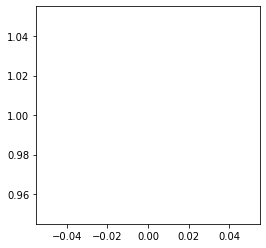

In [28]:
plt.figure(figsize=(4,4))
plt.plot(z)

Well, nothing happened.

It's a little complicated, but as you can see above, matplotlib doesn't handle complex numbers in the intuitive way you'd imagine, so we have to specify the real and imaginary components separately.

Also, we can use `plt.arrow()` to make the vector pretty.

Text(0, 0.5, 'Im')

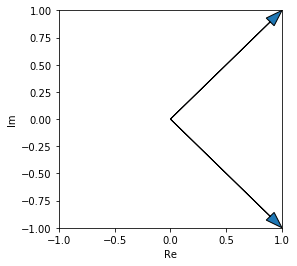

In [29]:
# make a new figure and define its size
plt.figure(figsize=(4,4))

# draw the arrows
plt.arrow(0,0,z.real,z.imag, head_width=0.1, length_includes_head=True)
plt.arrow(0,0,w.real,w.imag, head_width=0.1, length_includes_head=True)

plt.xlim([-1,1]);plt.ylim([-1,1]) # set limits manually

plt.xlabel('Re');plt.ylabel('Im') # label the axes

# [2] Q6: Complex Number in Polar Form
![Polar Form](img/polar.png)

As defined above, the complex number z is in its rectangular form, which specifies its real and imaginary components. We can also represent it in its polar form. As the diagram shows above, that means specifying its magnitude and angle (or sometimes called phase).

[2] 6.1: Note that the vector z is the hypotenuse of a right angled triangle with the real (x) and imaginary (y) components as its two sides. Express that in code below to find the magnitude and angle of z. Confirm that it's the same as the numpy results.

In [36]:
z_real = z.real
z_imag = z.imag

z_mag = np.sum(z_real**2 + z_imag**2)**0.5
z_ang = np.arctan(z_imag/z_real)

print(z_mag, z_ang)
print(np.abs(z), np.angle(z))

1.4142135623730951 0.7853981633974483
1.4142135623730951 0.7853981633974483


# [3] Q7: Complex Number as Vectors
Conveniently, we can express the complex number as a length-2 array, and do vector computation with them as we did above.

[1] 7.1: Looking at the plot where z and w are plotted as arrows, what is the angle (in radians or degrees) between those two vectors?

[1] 7.2: What do you expect is the dot product of z and w? Why? Make an argument without explicitly computing it.

[1] In the cell below, convert the complex number z and w into length-2 arrays, and confirm that the dot product is what you expected.

**Response for 7.1:**

**Response for 7.2:**

In [40]:
z_arr = np.array([1,1])
w_arr = np.array([1,-1])
np.dot(z_arr,w_arr)

0

---

# End Survery
Please take a few minutes to fill out the following as it will help us to improve the following assignments & lectures.

# Content:
What was one thing you learned from this lab & associated lectures?

ANSWER: 

---
What was one thing that you still found confusing after the lab, and need clarification?

ANSWER:

# Style:
What was one thing you enjoyed about the formatting of this assignment (e.g., clarity, structure, guidance, etc.)?

Answer:

---
What was one thing that you thought could use improvements on?

Answer:


# Thank you!